In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
datasets = {}
df = pd.DataFrame()
for time in range(10,370,30):
    datasets[time] = pd.read_csv(f'../results/bt{time}.csv', header=None)
    datasets[time].columns = ["node", "seen_id", "told_by", "hop", "start", "end"]
    datasets[time]["diff_time"] = datasets[time]["end"]-datasets[time]["start"]
    datasets[time] = datasets[time].groupby(["node", "seen_id"], as_index=False).sum().drop(["told_by", "hop", "start", "end"], axis=1)
    datasets[time]["broadcast_time"] = time
    datasets[time]["frecuency"] = 1/time
    df = pd.concat([df, datasets[time]], ignore_index=True)

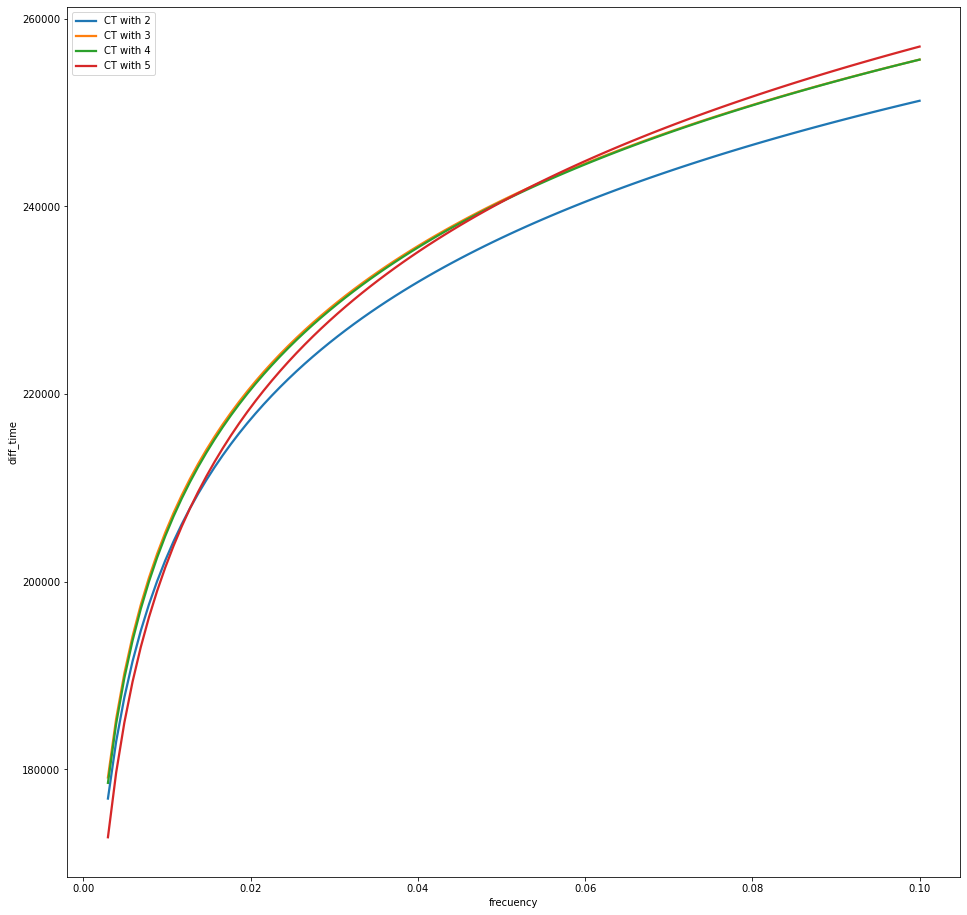

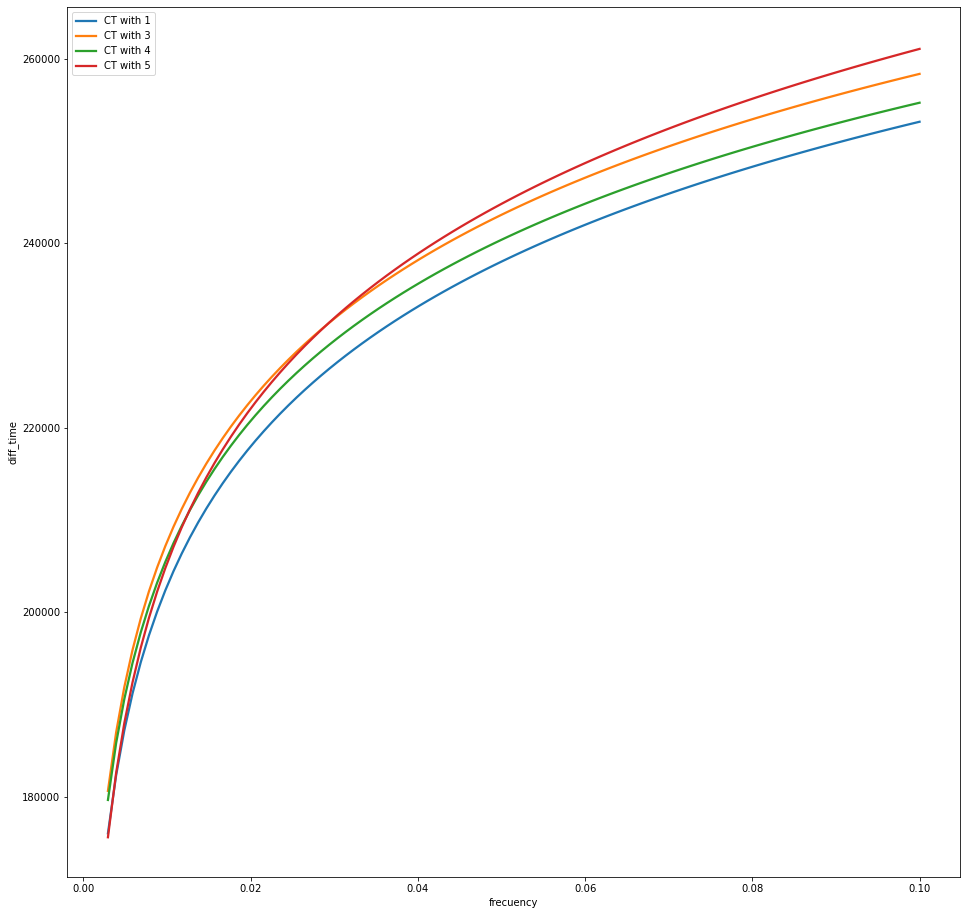

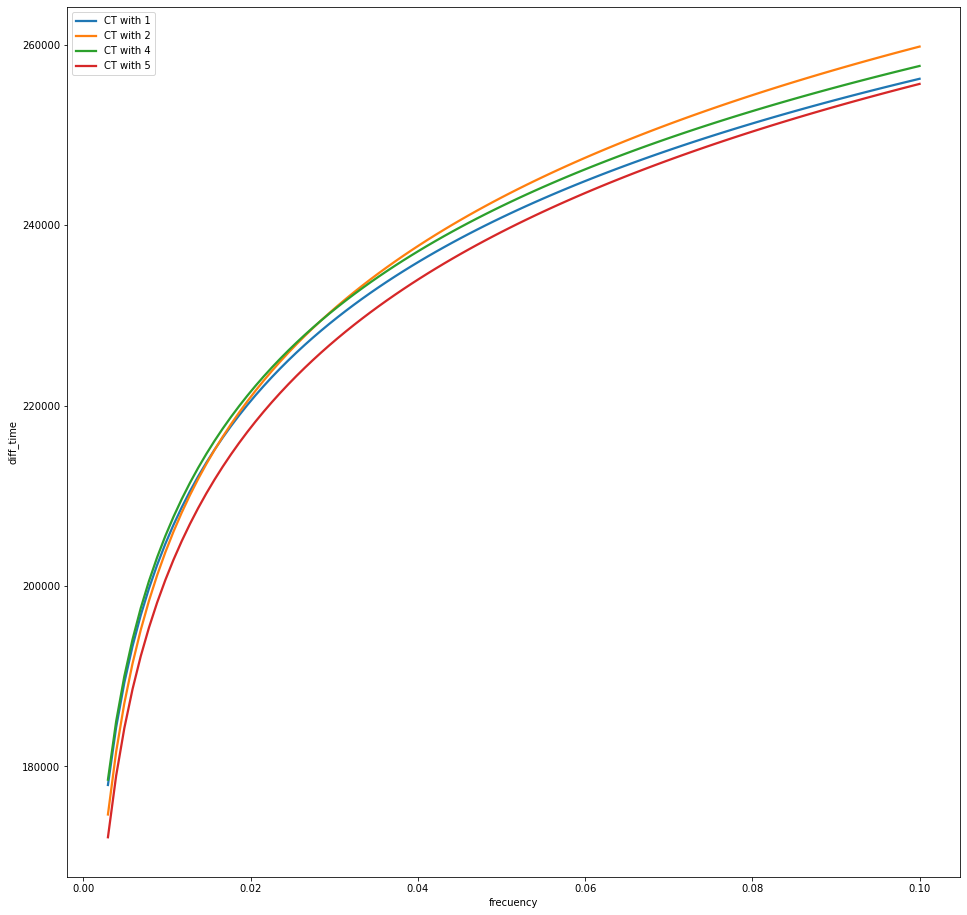

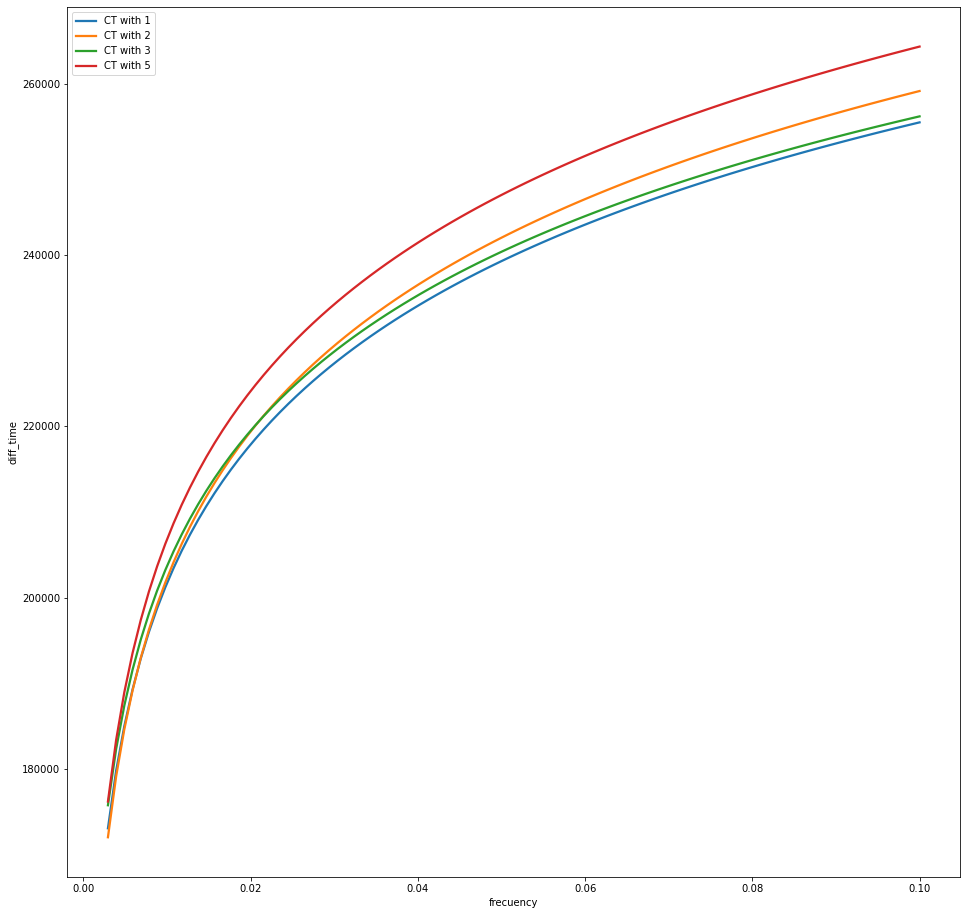

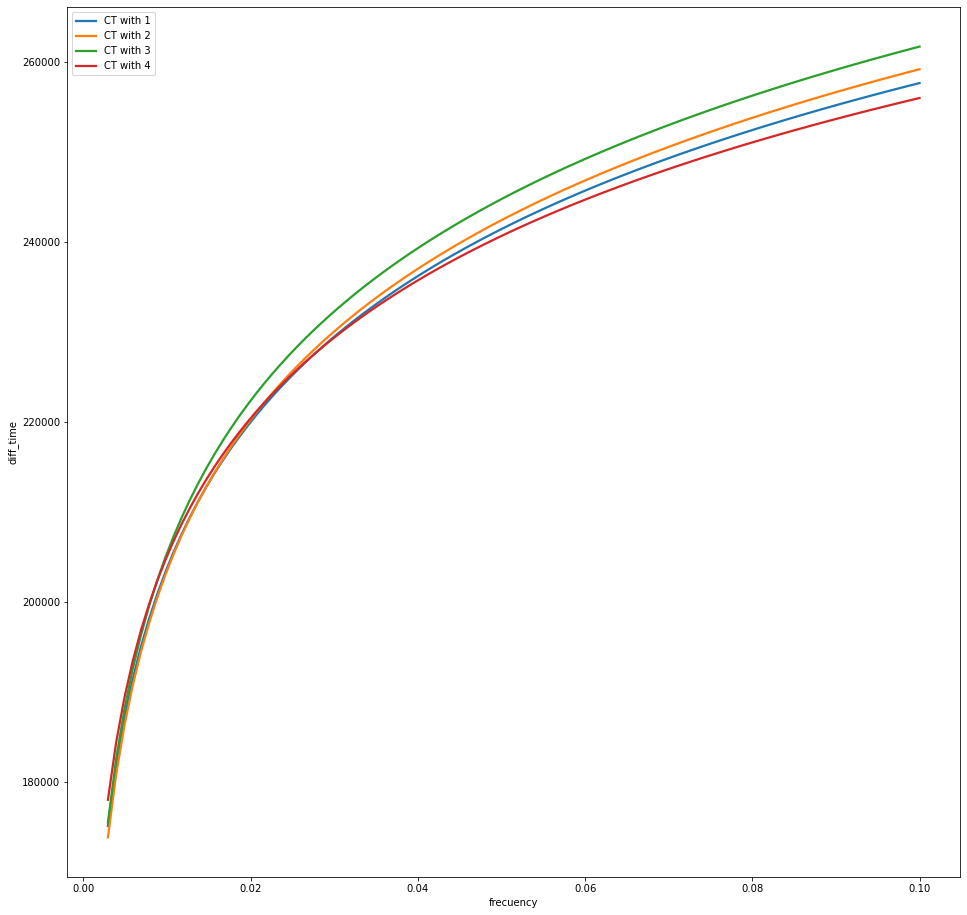

In [6]:
for node in range(1,6):
    fig, ax = plt.subplots(figsize=(16, 16))

    for seen_node in range(1,6):
        if node!=seen_node:
            df_aux = df.loc[(df.node==node)&(df.seen_id==seen_node)]
            sns.regplot(data=df_aux, x="frecuency", y="diff_time", ci=0, scatter=False, logx=True, ax=ax, label=f'CT with {seen_node}')

    ax.legend()
    plt.show()

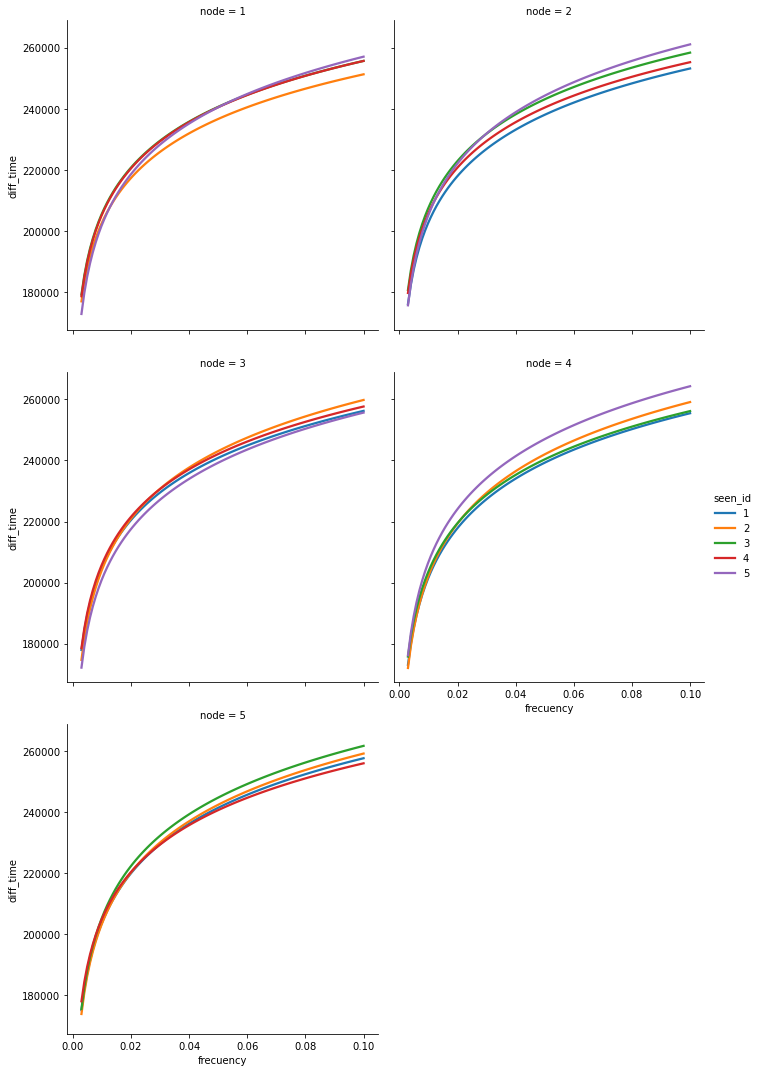

In [7]:
sns.lmplot(x="frecuency", y="diff_time", hue="seen_id", col="node", col_wrap=2, data=df, logx=True, scatter=False, ci=0);